
# Etude de cas & Régression Polynomiale

Ce notebook est dédié au jeu de données présenté à la séance 3 "calls&sales".<br>
Il s'agit ici de revoir l'import d'un fichier et son pré-traitement avant de tenter de modéliser le comportement de certaines variables, grâce à un algorithme de régression polynomiale.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

In [40]:
path = "Data/"
file_name = "calls&sales.xlsx"
df = pd.read_excel(path+file_name)

Immédiatement après l'import de données :
1. vérifier la taille du jeu de données importé
2. regarder quelles sont les colonnes présentes
3. jeter un coup d'œil sur le début des données (df.head), la fin (df.tail), puis un certain nombre de lignes au hasard (df.sample)
4. quelques indicateurs statistiques (df.describe)
5. visualiser quelques lignes au hasard
6. vérifier s'il y a des données manquantes

In [41]:
print(df.shape)

(5000, 69)


In [42]:
columns = df.columns
print(columns)

Index(['id', 'lead_score', 'activation_date', 'C_1601', 'C_1602', 'C_1603',
       'C_1604', 'C_1605', 'C_1606', 'C_1607', 'C_1608', 'C_1609', 'C_1610',
       'C_1611', 'C_1612', 'C_1701', 'C_1702', 'C_1703', 'C_1704', 'C_1705',
       'C_1706', 'C_1707', 'C_1708', 'C_1709', 'C_1710', 'C_1711', 'C_1712',
       'C_1801', 'C_1802', 'C_1803', 'C_1804', 'C_1805', 'C_1806', 'C_1807',
       'C_1808', 'C_1809', 'S_1601', 'S_1602', 'S_1603', 'S_1604', 'S_1605',
       'S_1606', 'S_1607', 'S_1608', 'S_1609', 'S_1610', 'S_1611', 'S_1612',
       'S_1701', 'S_1702', 'S_1703', 'S_1704', 'S_1705', 'S_1706', 'S_1707',
       'S_1708', 'S_1709', 'S_1710', 'S_1711', 'S_1712', 'S_1801', 'S_1802',
       'S_1803', 'S_1804', 'S_1805', 'S_1806', 'S_1807', 'S_1808', 'S_1809'],
      dtype='object')


In [43]:
df.head()

,id,lead_score,activation_date,C_1601,C_1602,C_1603,C_1604,C_1605,C_1606,C_1607,...,S_1712,S_1801,S_1802,S_1803,S_1804,S_1805,S_1806,S_1807,S_1808,S_1809
0,66336,A,2014-06-02,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,74753,D,2014-08-21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,74097,B,2014-08-21,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74126,B,2014-08-22,0,0,0,0,0,0,0,...,5,2,4,5,5,6,6,11,2,7
4,74224,B,2014-08-25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.tail()

,id,lead_score,activation_date,C_1601,C_1602,C_1603,C_1604,C_1605,C_1606,C_1607,...,S_1712,S_1801,S_1802,S_1803,S_1804,S_1805,S_1806,S_1807,S_1808,S_1809
4995,4074273,E,2018-10-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,136556,E,2018-10-02,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4997,4006443,C,2018-10-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,3976823,C,2018-10-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,4013363,C,2018-10-02,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.sample(10)

,id,lead_score,activation_date,C_1601,C_1602,C_1603,C_1604,C_1605,C_1606,C_1607,...,S_1712,S_1801,S_1802,S_1803,S_1804,S_1805,S_1806,S_1807,S_1808,S_1809
3094,2139623,C,2017-07-31,0,0,0,0,0,0,0,...,7,0,4,4,1,0,0,0,0,0
1578,258701,D,2016-07-11,0,0,0,10,1,12,38,...,0,0,0,2,0,2,1,3,2,1
3178,2213953,C,2017-08-29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2333,1559472,C,2017-02-14,0,0,0,0,0,0,0,...,3,4,6,3,9,8,16,9,11,14
276,124799,B,2015-04-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,1558022,C,2017-02-24,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
226,130682,A,2015-03-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012,883891,D,2016-11-15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3236,711481,D,2017-09-07,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1596,188881,C,2016-07-20,0,0,0,0,0,0,14,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.describe()

,id,C_1601,C_1602,C_1603,C_1604,C_1605,C_1606,C_1607,C_1608,C_1609,...,S_1712,S_1801,S_1802,S_1803,S_1804,S_1805,S_1806,S_1807,S_1808,S_1809
count,5.000000e+03,5000.0,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.273200e+06,0.0,0.00120,0.256000,0.525000,0.727600,0.949200,0.73700,1.425800,2.144400,...,0.76960,1.015200,0.951000,1.210000,1.093600,1.161000,1.243600,1.112000,1.209400,1.558800
std,1.177471e+06,0.0,0.04898,1.786702,2.648996,2.947802,3.460609,2.74163,5.206642,8.691413,...,2.90231,3.165213,3.100665,3.983601,3.840285,4.811082,6.081978,5.448944,5.555549,4.091979
min,2.565000e+03,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.280908e+05,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.732210e+05,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.276230e+06,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,4.074273e+06,0.0,2.00000,37.000000,66.000000,52.000000,57.000000,51.00000,97.000000,265.000000,...,122.00000,105.000000,102.000000,123.000000,166.000000,254.000000,367.000000,300.000000,317.000000,111.000000


Chaque ligne de ce jeu de données est organisé comme tel :
- un identifiant
- une catégorie "lead_score", de A à E (allez voir ce qu'est un lead score, en marketing)
- une date d'activation
- un certain nombre de colonnes correspondant aux "calls"
- un certain nombre de colonnes correspondant aux "sales" (même nombre que les calls)


Regardons maintenant un peu plus en détail le contenu de notre jeu de données.

Commençons par regarder le nombre d'identifiants uniques dans le jeu de données.<br>
Nous devrions avoir un nombre égal au nombre de lignes. S'il y en a moins, cela signifie soit que certains champs "id" sont manquants, soit qu'il y a plusieurs lignes pour un même identifiant/client.

In [47]:
# Nous devrions n'avoir que des identifiants uniques
values = np.unique(df["id"])

print(f"Nombre de lignes du jeu de données : {len(df)}")
print(f"Nombre d'identifiants uniques : {len(values)}")

Nombre de lignes du jeu de données : 5000
Nombre d'identifiants uniques : 5000


Regardons maintenant la répartition des lead_scores :

In [48]:
values, counts = np.unique(df["lead_score"], return_counts=True)

# On met dans un dictionnaire les valeurs uniques comme clefs (les lead_scores)
# et comme valeurs le nombre de lignes
lead_scores_repartition = dict(zip(values, counts))

print(f"Répartition des lead scores : {lead_scores_repartition}")

lead_scores_repartition_pc = dict(zip(values, 100*counts/sum(counts)))

print(f"Répartition des lead scores en pourcentage : {lead_scores_repartition_pc}")

Répartition des lead scores : {'A': 436, 'B': 765, 'C': 1294, 'D': 2433, 'E': 72}
Répartition des lead scores en pourcentage : {'A': 8.72, 'B': 15.3, 'C': 25.88, 'D': 48.66, 'E': 1.44}


Nous voyons que certaines catégories sont largement sous-représentées.<br>
Cela signifie que les conclusions que nous allons tirer sur la catégorie E seront à prendre avec des pincettes : en effet, nous n'avons que 72 représentants de cette catégories sur 5000 clients ! <br>
Visualisons cette répartition pour s'en rendre bien compte.

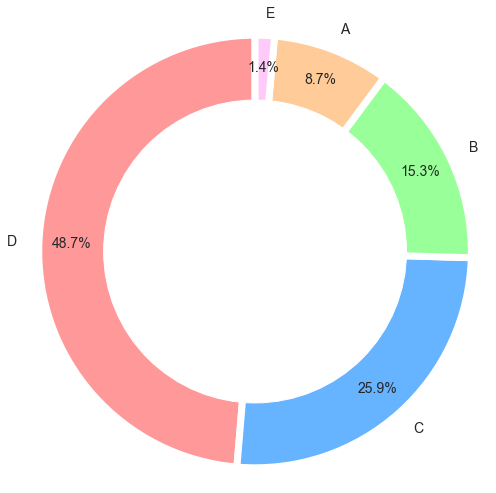

In [49]:
# Similaire à ce qu'on récupère dans la variable "counts" lorsqu'on fait (cf. ci-dessus) :
# values, counts = np.unique(df["lead_score"], return_counts=True)
lead_scores_counts = df['lead_score'].value_counts()
labels = lead_scores_counts.keys().tolist()
sizes = lead_scores_counts.tolist()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffc9f9']
 
fig1, ax1 = plt.subplots(figsize=(7, 7))

w, tl, t = ax1.pie(sizes, colors=colors, labels=labels,
                autopct='%1.1f%%', startangle=90,
                pctdistance=0.85, textprops={'fontsize': 14},
                wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

plt.tight_layout()

Nous allons, dans un premier temps, isoler les colonnes calls et sales.

In [50]:
# List comprehension pour isoler les colonnes "calls"
columns_calls = [iCol
                 for iCol in df.columns
                 if iCol.startswith("C_")]
# Identique à :
# columns_calls = list()
# for iCol in df.columns:
#    if iCol.startswith("C_"):
#        columns_calls.append(iCol)

columns_sales = [iCol
                 for iCol in df.columns
                 if iCol.startswith("S_")]

# Print, pour vérifier
print(f"Colonnes 'calls' : {columns_calls}")
print("\n") # saut de ligne
print(f"Colonnes 'sales' : {columns_sales}")

Colonnes 'calls' : ['C_1601', 'C_1602', 'C_1603', 'C_1604', 'C_1605', 'C_1606', 'C_1607', 'C_1608', 'C_1609', 'C_1610', 'C_1611', 'C_1612', 'C_1701', 'C_1702', 'C_1703', 'C_1704', 'C_1705', 'C_1706', 'C_1707', 'C_1708', 'C_1709', 'C_1710', 'C_1711', 'C_1712', 'C_1801', 'C_1802', 'C_1803', 'C_1804', 'C_1805', 'C_1806', 'C_1807', 'C_1808', 'C_1809']


Colonnes 'sales' : ['S_1601', 'S_1602', 'S_1603', 'S_1604', 'S_1605', 'S_1606', 'S_1607', 'S_1608', 'S_1609', 'S_1610', 'S_1611', 'S_1612', 'S_1701', 'S_1702', 'S_1703', 'S_1704', 'S_1705', 'S_1706', 'S_1707', 'S_1708', 'S_1709', 'S_1710', 'S_1711', 'S_1712', 'S_1801', 'S_1802', 'S_1803', 'S_1804', 'S_1805', 'S_1806', 'S_1807', 'S_1808', 'S_1809']


Lorsque nous allons visualiser les données, les fonctions de générations de graphiques vont prendre les noms de colonnes par défaut.<br>
Nous n'avons besoin que des dates et non du "S_" ou du "C_" que nous allons ici filtrer :

In [51]:
# 
dates = [iCol[2:4] + "-" + iCol[4:]
        for iCpt, iCol in enumerate(columns_calls)]

# De nouveau, identique à (mais beaucoup plus efficace computationnellement) :
# dates = list()
# for iCpt, iCol in enumerate(columns_calls):
#     dates.append(iCol[2:4] + "-" + iCol[4:])
    
print(dates)

['16-01', '16-02', '16-03', '16-04', '16-05', '16-06', '16-07', '16-08', '16-09', '16-10', '16-11', '16-12', '17-01', '17-02', '17-03', '17-04', '17-05', '17-06', '17-07', '17-08', '17-09', '17-10', '17-11', '17-12', '18-01', '18-02', '18-03', '18-04', '18-05', '18-06', '18-07', '18-08', '18-09']


Visualisons maintenant les calls puis les sales d'une ligne prise au hasard.
Relancer cette cellule autant que vous voulez : la ligne visualisée sera toujours différente.

Note : un graphique sans titre ni label des axes ne veut rien dire.
N'oubliez jamais de les mettre :)

Visualisation de la ligne 2861


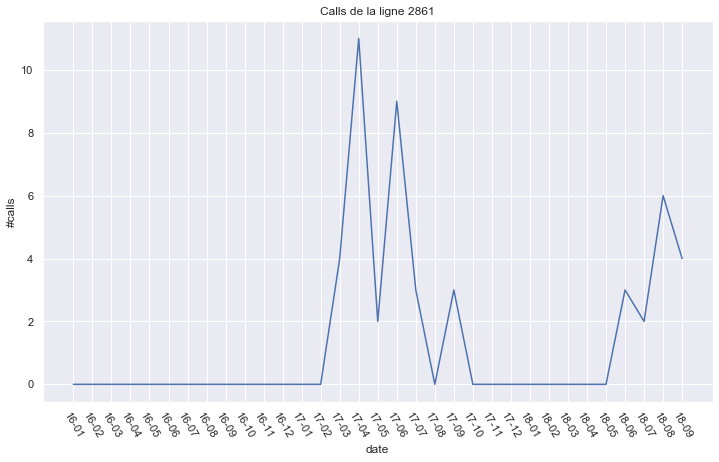

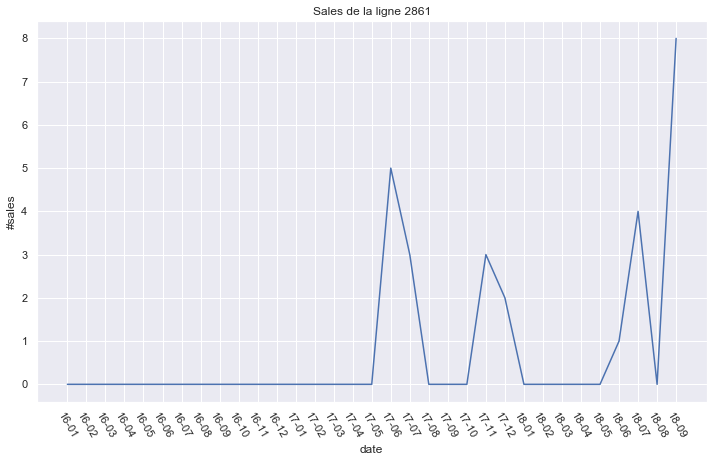

In [52]:
# On choisit une ligne au hasard.
line_idx = np.random.randint(len(df))

client_data = df.iloc[line_idx]

print(f"Visualisation de la ligne {line_idx}")

# Pour les calls
plt.figure(figsize=(12, 7))  # on crée une figure avec certaines dimensions (les dimensions sont facultatives)
plt.plot(dates, client_data[columns_calls])  # plt.plot(x, y)
plt.xticks(rotation=300)  # pour que les labels de l'axe des abscisses soit lisible
plt.xlabel("date")  # label de l'axe des abscisses
plt.ylabel("#calls")  # label de l'axe des ordonnées
plt.title(f"Calls de la ligne {line_idx}")  # titre du graphique

# Pour les sales
plt.figure(figsize=(12, 7))
plt.plot(dates, client_data[columns_sales])
plt.xticks(rotation=300)
plt.xlabel("date")
plt.ylabel("#sales")
_ = plt.title(f"Sales de la ligne {line_idx}")

In [53]:
from datetime import datetime

print(df.iloc[0, 2])
datetime.now() - datetime.strptime(df.iloc[0, 2], "%Y-%m-%d")

2014-06-02


datetime.timedelta(days=2143, seconds=69346, microseconds=93958)

Si l'on souhaite visualiser les calls et les sales d'une ligne en même temps, c'est tout à fait possible :

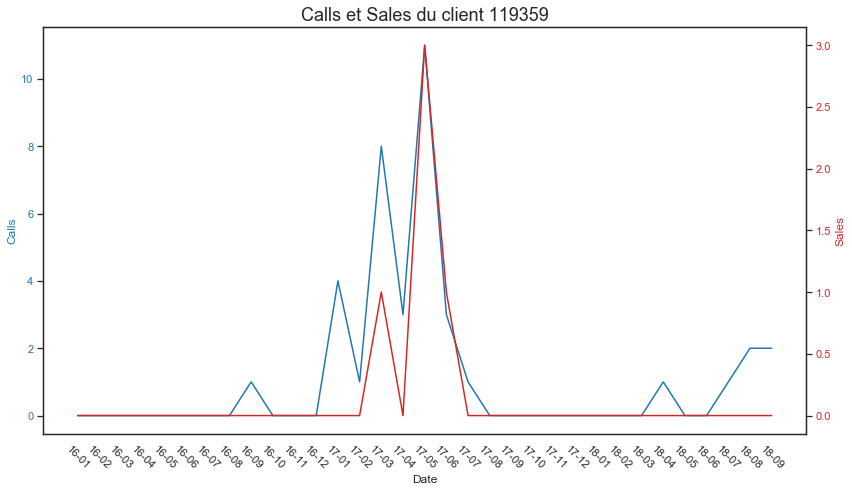

In [54]:
# On choisit une ligne au hasard (rappel, à une ligne correspond un client)
customer_idx = np.random.randint(len(df))

client_data = df.iloc[customer_idx]

# On enlève le fond gris et la grille des graphes ci-dessus
sns.set_style("white")


# création de la figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# on définit une couleur
color = 'tab:blue'

# label de l'axe des abscisses
ax1.set_xlabel('Date')

# label de l'axe des ordonnées
ax1.set_ylabel('Calls', color=color)

# On affiche les données
ax1.plot(dates, client_data[columns_calls], color=color)

# on change la couleur des ticks de l'axe des ordonnées
ax1.tick_params(axis='y', labelcolor=color)

# pour que les labels de l'axe des abscisses soit lisible
plt.xticks(rotation=315)

# titre du graphique
plt.title(f"Calls et Sales du client {client_data['id']}", fontsize=18)


# on "crée" un nouveau graphe par-dessus qui est le jumeau du premier
ax2 = ax1.twinx()

# 2è plot
color = 'tab:red'
ax2.set_ylabel('Sales', color=color)
ax2.plot(dates, client_data[columns_sales], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()

Et si l'on pense avoir souvent besoin de visualiser une ligne en particulier, on peut créer une fonction dédiée.
Ce qui suit est la même chose qu'au-dessus, les commentaires en moins.

In [55]:
def plot_two_series(x_data, s1, s2):
    sns.set_style("white")
    
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Calls', color=color)
    ax1.plot(x_data, s1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.xticks(rotation=315)

    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel('Sales', color=color)
    ax2.plot(x_data, s2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

Il est maintenant possible de visualiser les calls et les sales d'une ligne en particulier : 

Visualisation du client 74535


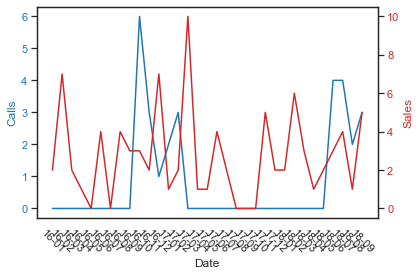

In [56]:
customer_idx = 100

print(f"Visualisation du client {df.iloc[customer_idx]['id']}")

customer_calls = df.iloc[customer_idx][columns_calls]
customer_sales = df.iloc[customer_idx][columns_sales]

plot_two_series(dates, customer_calls, customer_sales)

# Il est évidemment possible de directement écrire :
# plot_two_series(dates, df.iloc[customer_idx][columns_calls], df.iloc[customer_idx][columns_calls])
# et donc de ne pas passer par l'assignation préalable de variables
# (utile pour optimiser un peu l'utilisation des ressources en mémoire)

Regardons maintenant la moyenne des calls et des sales. Cela va nous donner une idée du comportement moyen des données.

Mais attention cependant : la moyenne <b>lisse</b> les données et ne représente une version peut-être biaisée de la réalité.

Pour cela, nous pouvons réutiliser la fonction que nous venons de définir. <br>
Nous allons simplement lui donner les moyennes en argument :

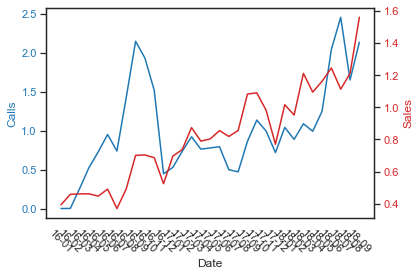

In [57]:
calls_mean = np.mean(df[columns_calls])

sales_mean = np.mean(df[columns_sales])

plot_two_series(dates, calls_mean, sales_mean)

Observons maintenant la moyenne des clients par "lead_score".<br>
Nous allons faire ça avec une boucle directement.

In [58]:
# On commence par isoler les différentes valeurs de lead scores (les valeurs uniques donc)
unique_lead_scores = np.unique(df["lead_score"])

print(unique_lead_scores)

['A' 'B' 'C' 'D' 'E']


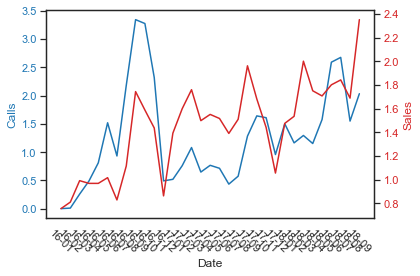

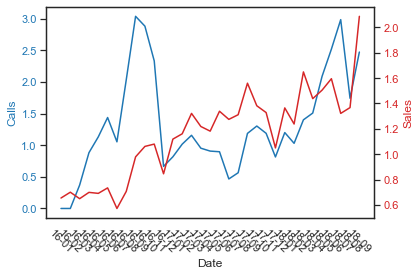

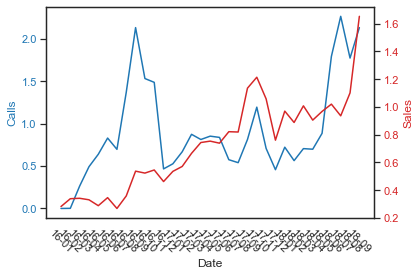

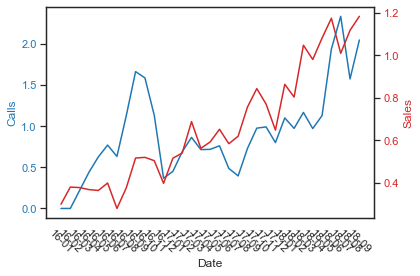

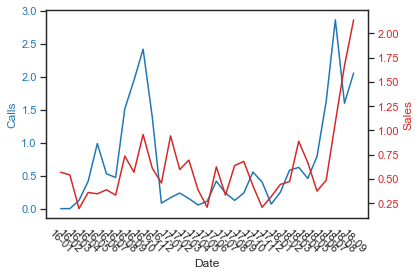

In [59]:
# A chaque tour de boucle, une nouvelle valeur de lead score est prise,
# on récupère tous les clients dans cette catégorie
# puis on affiche la moyenne des calls et des sales
# toujours grâce à la fonction que nous avons définie plus haut
for iCpt, iScore in enumerate(unique_lead_scores):
    sub_df = df[df["lead_score"] == iScore]
    plot_two_series(dates, np.mean(sub_df[columns_calls]), np.mean(sub_df[columns_sales]))

Nous voyons là clairement que le premier graphique représentant la moyenne de <i>tout</i> le jeu de données est une bonne indication de l'évolution globale de tous les clients mais qu'elle lisse effectivement un peu la réalité. <br>
Les comportements individuels ont certes l'air d'aller globalement croissants mais certains sont très erratiques (lead_score A), d'autres sont plutôt stables dans le temps jusqu'aux tous derniers mois (lead_score E).<br>

Il est alors ici important de se rappeler la taille de chaque catégorie :

In [60]:
values, counts = np.unique(df["lead_score"], return_counts=True)
print(dict(zip(values, counts)))

{'A': 436, 'B': 765, 'C': 1294, 'D': 2433, 'E': 72}


In [61]:
print(dict(zip(values, 100*counts/sum(counts))))

{'A': 8.72, 'B': 15.3, 'C': 25.88, 'D': 48.66, 'E': 1.44}


In [62]:
lead_list = ["A", "B", "C", "D"]
df_score_D = df[df['lead_score'].isin(lead_list)]

In [63]:
sel_columns = ['id', 'lead_score']
sel_columns.extend(columns_calls)
df_calls = df_score_D[sel_columns]

In [64]:
columns_names = ['id', 'lead_score']
columns_names.extend(dates)
df_calls.columns = columns_names

In [65]:
df_calls_m = df_calls.melt(id_vars=['id', 'lead_score'],
                           value_vars=df_calls.columns[2:].tolist(),
                           var_name="Date",
                           value_name="Calls")
print(df_calls_m)

             id lead_score   Date  Calls
0         66336          A  16-01      0
1         74753          D  16-01      0
2         74097          B  16-01      0
3         74126          B  16-01      0
4         74224          B  16-01      0
5         74326          D  16-01      0
6         74369          A  16-01      0
7         74391          D  16-01      0
8         74501          C  16-01      0
9         74382          B  16-01      0
10        74509          B  16-01      0
11        74645          A  16-01      0
12        74443          B  16-01      0
13        74414          A  16-01      0
14        74870          B  16-01      0
15        74777          B  16-01      0
16        74580          C  16-01      0
17        74131          D  16-01      0
18        74899          B  16-01      0
19        74534          D  16-01      0
20        74857          B  16-01      0
21        77168          D  16-01      0
22        77024          A  16-01      0
23        74339 

In [66]:
df_sales = df_score_D[columns_sales]

df_sales.columns = dates

df_sales_m = df_sales.melt(value_vars=df_sales.columns.tolist(),
                           var_name="Date",
                           value_name="Sales")
print(df_sales_m)

         Date  Sales
0       16-01     19
1       16-01      0
2       16-01      0
3       16-01      5
4       16-01      0
5       16-01      4
6       16-01      0
7       16-01      2
8       16-01      0
9       16-01      0
10      16-01      0
11      16-01      0
12      16-01      0
13      16-01      7
14      16-01      7
15      16-01      2
16      16-01      0
17      16-01      0
18      16-01      0
19      16-01      6
20      16-01      0
21      16-01     36
22      16-01      0
23      16-01      0
24      16-01      0
25      16-01      0
26      16-01      0
27      16-01      0
28      16-01      0
29      16-01      2
...       ...    ...
162594  18-09      3
162595  18-09      4
162596  18-09      1
162597  18-09      2
162598  18-09      2
162599  18-09      1
162600  18-09      1
162601  18-09      1
162602  18-09      2
162603  18-09      1
162604  18-09      2
162605  18-09      2
162606  18-09      1
162607  18-09      2
162608  18-09      2
162609  18-09

In [67]:
df_sales_m = pd.Series(df_sales_m["Sales"])

df_all = pd.concat([df_calls_m, df_sales_m], axis=1)

print(df_all)

             id lead_score   Date  Calls  Sales
0         66336          A  16-01      0     19
1         74753          D  16-01      0      0
2         74097          B  16-01      0      0
3         74126          B  16-01      0      5
4         74224          B  16-01      0      0
5         74326          D  16-01      0      4
6         74369          A  16-01      0      0
7         74391          D  16-01      0      2
8         74501          C  16-01      0      0
9         74382          B  16-01      0      0
10        74509          B  16-01      0      0
11        74645          A  16-01      0      0
12        74443          B  16-01      0      0
13        74414          A  16-01      0      7
14        74870          B  16-01      0      7
15        74777          B  16-01      0      2
16        74580          C  16-01      0      0
17        74131          D  16-01      0      0
18        74899          B  16-01      0      0
19        74534          D  16-01      0

# Regression Polynomiale

Etape 1 : normaliser les données

In [68]:
# On commence par initialiser un dictionnaire qui contiendra toutes les valeurs normalisées
# On le reconvertira ensuite en DataFrame
scores = ['A', 'B', 'C', 'D', 'E']
sales_norm = {iScore: None for iScore in scores}
print(sales_norm)

{'A': None, 'B': None, 'C': None, 'D': None, 'E': None}


In [69]:
# On normalise ici les données (on recalibre pour qu'elles soient toutes comprises entre 0 et 1)
for iScore in scores:
    data_of_lead_score = df[df[columns[1]] == iScore]
    sales_norm[iScore] = np.sum(data_of_lead_score[columns_sales])
    sales_score_min = min(sales_norm[iScore])
    sales_score_max = max(sales_norm[iScore])
    sales_norm[iScore] = (sales_norm[iScore] - sales_score_min) / (sales_score_max - sales_score_min)

sales_norm_df = pd.DataFrame.from_dict(sales_norm)
print(sales_norm_df)

               A         B         C         D         E
S_1601  0.000000  0.054404  0.010045  0.022283  0.192857
S_1602  0.034483  0.084629  0.050781  0.111414  0.178571
S_1603  0.147989  0.050950  0.053013  0.108686  0.000000
S_1604  0.133621  0.083765  0.045201  0.098226  0.085714
S_1605  0.133621  0.078584  0.014509  0.093679  0.078571
S_1606  0.163793  0.107081  0.056362  0.132333  0.100000
S_1607  0.045977  0.000000  0.000000  0.000000  0.071429
S_1608  0.225575  0.088946  0.065290  0.106867  0.278571
S_1609  0.619253  0.268566  0.194196  0.262392  0.192857
S_1610  0.521552  0.322971  0.184152  0.266030  0.392857
S_1611  0.426724  0.335060  0.200335  0.248749  0.214286
S_1612  0.067529  0.180484  0.140067  0.130969  0.135714
S_1701  0.399425  0.360967  0.193080  0.261482  0.385714
S_1702  0.528736  0.388601  0.218750  0.288768  0.207143
S_1703  0.629310  0.494819  0.286830  0.452024  0.257143
S_1704  0.465517  0.426598  0.343192  0.312869  0.100000
S_1705  0.498563  0.402418  0.3

Il est intéressant de voir que les valeurs maximum sont systématiquement les plus récentes.
Cela est cohérent avec la croissance globale que nous avons vu plus haut pour chaque lead score.<br>
Vérifions ça aussi visuellement.

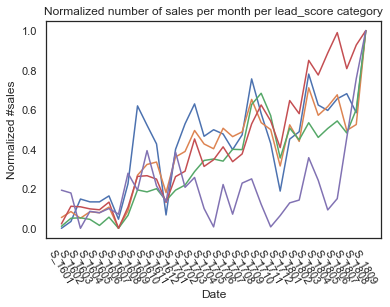

In [70]:
for iScore in scores:
    plt.plot(sales_norm_df[iScore])
    plt.xticks(rotation=300)
    plt.xlabel("Date")
    plt.ylabel("Normalized #sales")
    plt.title("Normalized number of sales per month per lead_score category")

Les courbes n'ont pas l'air d'avoir changé par rapport à celles initiales (cf. ci-dessus).
La normalisation n'a donc pas modifié le comportement des courbes mais les a simplement contraintes entre 0 et 1.
Cela va nous permettre de les comparer correctement.

In [72]:
# Nombre de mois
nb_monthes = len(dates)

X = np.arange(0, nb_monthes)
x_new = np.linspace(X[0], X[-1], nb_monthes)


Nous allons ici définir le degré du polynôme à optimiser. Le degré correspond à la valeur maximum de l'exposant de la fonction approximant nos données.<br>
Ainsi, un polynôme de degré 2 aura une forme du type : y = ax + bx^2 + c<br>
Un polynôme de degré 3 aura une forme du type : y = ax + bx^2 + cx^3 + d<br>
Un polynôme de degré 1 correspond à une régression linéaire (cf. séance précédente).
<br><br>
Chaque type de polynôme permet de modéliser des comportements particuliers et, globalement, plus le degré est haut, plus la fonction sera complexe. En revanche, il n'est pas bon d'avoir une fonction qui approxime parfaitement les données d'entraînement. En effet, une telle fonction sera très mauvaise pour <i>généraliser</i> sa connaissance.

In [71]:
degree = 2

In [77]:
sales_fit = dict()

coefficients = dict()

fcn_fit = {iScore: None 
           for iScore in scores}

for iScore in scores:
    Y = sales_norm[iScore]
    z = np.polyfit(X, Y, degree)
    f = np.poly1d(z)
    fcn_fit[iScore] = f
    y_new = f(x_new)
    sales_fit[iScore] = y_new
    coefficients[iScore] = f

In [88]:
for iScore, iFunction in zip(scores, fcn_fit):
    print(f"La catégorie {iScore} est approximée par :\n y = {fcn_fit[iFunction]}\n")

La catégorie A est approximée par :
 y =             2
-0.0003374 x + 0.03036 x + 0.06168

La catégorie B est approximée par :
 y =             2
-0.0002696 x + 0.02991 x + 0.001079

La catégorie C est approximée par :
 y =             2
-4.265e-06 x + 0.02247 x - 0.02894

La catégorie D est approximée par :
 y =            2
0.0006849 x + 0.007526 x + 0.06439

La catégorie E est approximée par :
 y =            2
0.0009768 x - 0.02212 x + 0.2326



In [98]:
for iScore, iFunction in zip(scores, fcn_fit):
    print(f"Catégorie : {iScore}, coefficient du plus haut degré :\n{fcn_fit[iFunction][2]}\n")

Catégorie : A, coefficient du plus haut degré :
-0.0003373824628445784

Catégorie : B, coefficient du plus haut degré :
-0.0002696037997652377

Catégorie : C, coefficient du plus haut degré :
-4.264787843289926e-06

Catégorie : D, coefficient du plus haut degré :
0.0006848815588535131

Catégorie : E, coefficient du plus haut degré :
0.0009767873425029835



Observons maintenant ces courbes.

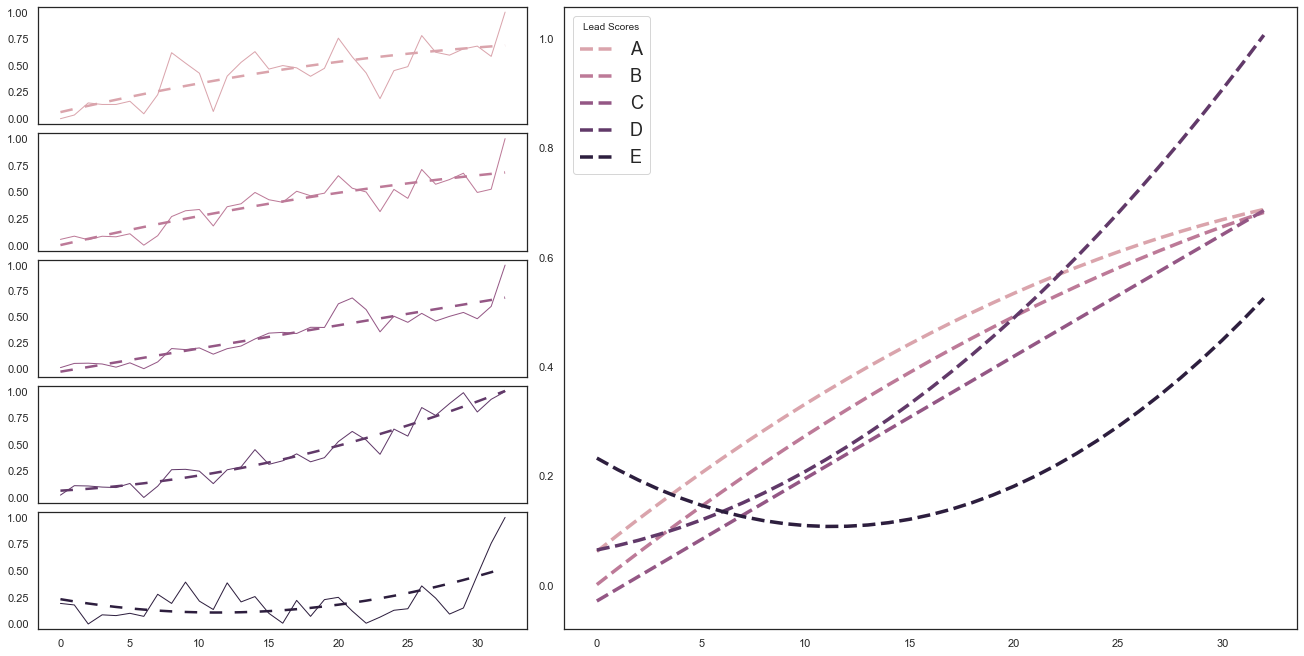

In [36]:
colors = sns.cubehelix_palette(6)
fig = plt.figure(figsize=(18,9), constrained_layout=True)
gs = fig.add_gridspec(5, 5)

f_ax1 = fig.add_subplot(gs[0, :2])
f_ax1.plot(X, sales_norm['A'], color=colors[1], linewidth=1)
f_ax1.plot(x_new, sales_fit['A'], color=colors[1], linewidth=2.5, linestyle=(0, (5, 5)))
_ = f_ax1.set_xticklabels([])

f_ax2 = fig.add_subplot(gs[1, :2])
f_ax2.plot(X, sales_norm['B'], color=colors[2], linewidth=1)
f_ax2.plot(x_new, sales_fit['B'], color=colors[2], linewidth=2.5, linestyle=(0, (5, 5)))
_ = f_ax2.set_xticklabels([])

f_ax3 = fig.add_subplot(gs[2, :2])
f_ax3.plot(X, sales_norm['C'], color=colors[3], linewidth=1)
f_ax3.plot(x_new, sales_fit['C'], color=colors[3], linewidth=2.5, linestyle=(0, (5, 5)))
_ = f_ax3.set_xticklabels([])

f_ax4 = fig.add_subplot(gs[3, :2])
f_ax4.plot(X, sales_norm['D'], color=colors[4], linewidth=1)
f_ax4.plot(x_new, sales_fit['D'], color=colors[4], linewidth=2.5, linestyle=(0, (5, 5)))
_ = f_ax4.set_xticklabels([])

f_ax5 = fig.add_subplot(gs[4, :2])
f_ax5.plot(X, sales_norm['E'], color=colors[5], linewidth=1)
f_ax5.plot(x_new, sales_fit['E'], color=colors[5], linewidth=2.5, linestyle=(0, (5, 5)))

f_ax6 = fig.add_subplot(gs[:, 2:])
for iScoreCpt, iScore in enumerate(scores):
    f_ax6.plot(x_new, sales_fit[iScore], color=colors[iScoreCpt+1], linewidth=3.5, linestyle='dashed')

plt.legend(['A', 'B', 'C', 'D', 'E'], prop={'size': 18}, title='Lead Scores')

Que tirer de ces courbes ?<br>
Nous voyons que nous pouvons émettre une hypothèse sur l'évolution des différentes catégories :<br>
1. Les catégories A, B et C semblent décroître,
2. La catégorie D semble croître
3. La catégorie E semble être la plus prometteuse (mais nous n'avons eu que 72 valeurs pour calculer la moyenne et il est probable que ces données soient changeantes dans le futur)

Pour la catégorie E en revanche, il est peut-être possible d'améliorer cette courbe en augmentant le degré du polynôme.<br>
Nous allons ici regarder le résultat des approximations pour des degrés de 1 à 16 (le degré 1 étant une régression linéaire : une droite donc).

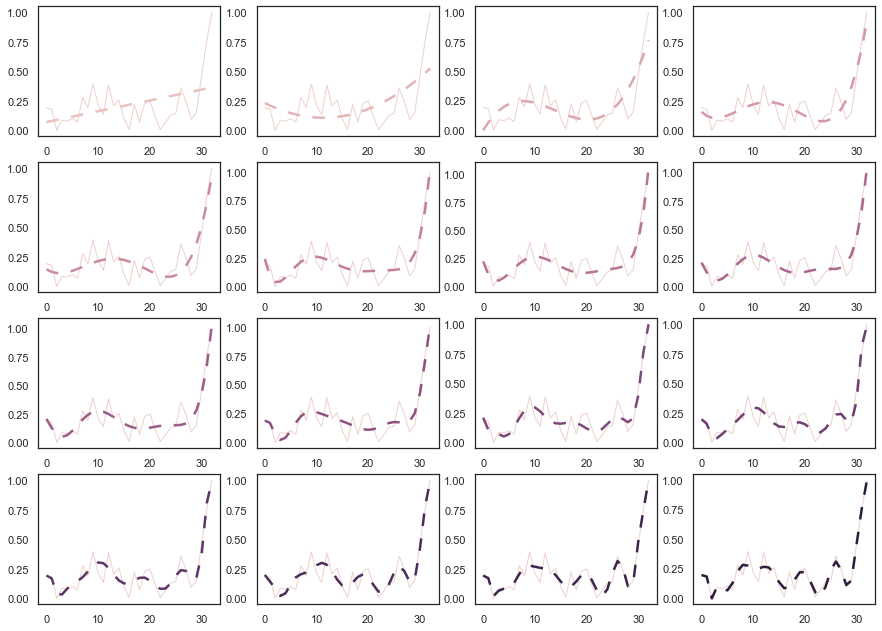

In [162]:
iScore = "E"

sales_fit = dict()

coefficients = dict()

fcn_fit = {iScore: None 
           for iScore in scores}

errors = list()

colors = sns.cubehelix_palette(17)

sns.set_style("white")
plt.figure(figsize=(15, 11))

for iDeg in range(1, 17):
    Y = sales_norm[iScore]
    z, res, _, _, _ = np.polyfit(X, Y, iDeg, full=True)
    f = np.poly1d(z)
    fcn_fit[iScore] = f
    y_new = f(x_new)
    sales_fit[iScore] = y_new
    coefficients[iScore] = f
    errors.append(res)
    plt.subplot(4, 4, iDeg)
    plt.plot(X, sales_norm['E'], color=colors[0], linewidth=1)
    plt.plot(x_new, y_new, color=colors[iDeg], linewidth=2.5, linestyle=(0, (5, 5)))

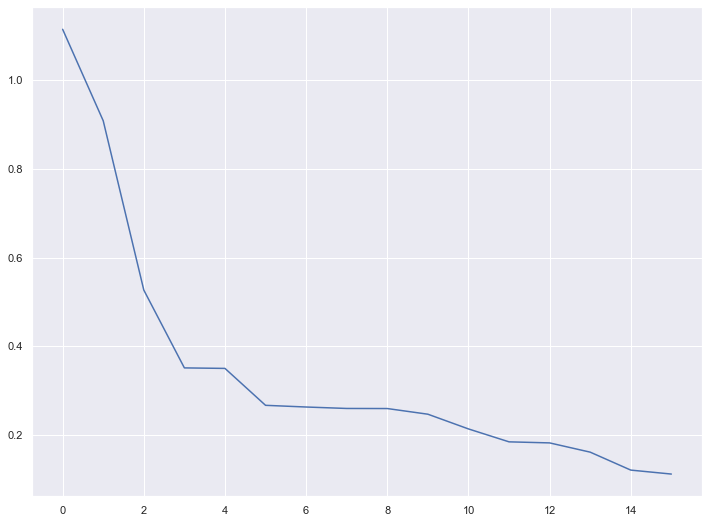

In [163]:
sns.set()
plt.figure(figsize=(12, 9))
plt.plot(errors)

Nous voyons là que l'erreur décroît très fortement jusqu'au degré 3 - 4 mais qu'ensuite la décroissance est nettement plus faible.<br>
Il n'est ainsi pas forcément nécessaire d'augmenter la complexité du modèle infinement (qui dit modèle plus complexe, dit coût computationnel plus important mais aussi capacité de généraliser beaucoup plus faible).
Nous voyons d'ailleurs sur les graphiques plus haut que les courbes ne changent plus énormément à partir du degré 4.